
**About dataset**

work_year: The year the salary was paid

experience_level: The experience level in the job during the year with the following possible values: EN = Entry-level / Junior; MI = Mid-level / Intermediate; SE = Senior-level / Expert; EX = Executive-level / Director

employment_type: The type of employement for the role: PT = Part-time; FT = Full-time; CT = Contract; FL = Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code(Alpha-2 code).

remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 = No remote work (less than 20%); 50 = Partially remote; 100 = Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code(Alpha-2 code).

company_size: The average number of people that worked for the company during the year: S = less than 50 employees (small); M = 50 to 250 employees (medium); L = more than 250 employees (large)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df= pd.read_csv('../content/ds_salaries.csv')

In [ ]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.shape

(607, 11)

**drop first column and show the first 10 rows after droping **

In [ ]:
df.drop(["Unnamed: 0"],inplace=True, axis=1)
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


**Replacing some of the values to understand the graphs clearly**

In [ ]:
df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace=True)
df.employment_type.replace(['FT','PT','CT','FL'],['Full Time','Part Time','Contract','Freelance'],inplace=True)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full Time,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,M
3,2020,Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,L


**checking for null values**

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**checking for unique value**

In [ ]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

**sort the table based on salary**

In [ ]:
df = df.sort_values(by=['salary'])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
238,2021,Entry,Full Time,Data Scientist,4000,USD,4000,VN,On-site,VN,M
185,2021,Mid,Full Time,Data Engineer,4000,USD,4000,IR,Fully Remote,IR,M
15,2020,Mid,Full Time,Data Analyst,8000,USD,8000,PK,Partially Remote,PK,L
124,2021,Entry,Part Time,Data Analyst,8760,EUR,10354,ES,Partially Remote,ES,M
196,2021,Entry,Full Time,BI Data Analyst,9272,USD,9272,KE,Fully Remote,KE,S


**Plotting heatmap for better analysis**

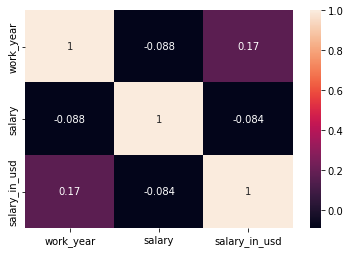

In [ ]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True) 

In [ ]:
df.to_csv('ds_salaries_cleaned.csv')